# Importing Libraries

In [5]:
from fitizens_libraries.load_and_process_training_data import load_training_data
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pycaret.classification import *
import plotly.express as px

# Creating Auxiliary Functions


In [6]:
def create_custom_dataframe(series):
    df =  series[["linAccX", "linAccY", "linAccZ", "gyroX", "gyroY", "gyroZ", "magnX", "magnY", "magnZ"]]
    return df

In [7]:
def create_training_data_stats(df, target):
    stats_dict = {}
    series = create_custom_dataframe(df)
    
    for column in series.columns:
        mean = series[column].mean()
        std = series[column].std()
        median = series[column].median()
        #skewness = series[column].skew()
        #kurtosis = series[column].kurtosis()

        #min_val = series[column].min()
        max_val = series[column].max()
       # range_val = max_val - min_val
        quartile_25 = np.percentile(series[column], 25)
        quartile_75 = np.percentile(series[column], 75)
        iqr = quartile_75 - quartile_25
    

        stats_dict[f"{column}_mean"] = mean
        stats_dict[f"{column}_std"] = std
        stats_dict[f"{column}_median"] = median
       # stats_dict[f"{column}_skewness"] = skewness
       # stats_dict[f"{column}_kurtosis"] = kurtosis

       # stats_dict[f"{column}_min"] = min_val
        stats_dict[f"{column}_max"] = max_val
       # stats_dict[f"{column}_range"] = range_val
        stats_dict[f"{column}_quartile_25"] = quartile_25
        stats_dict[f"{column}_quartile_75"] = quartile_75
        stats_dict[f"{column}_iqr"] = iqr
        
        
    stats_dict["target"] = target
    return stats_dict

# Loading Data

In [8]:
folder_path = "BURPEE"
os.makedirs(folder_path, exist_ok=True)
file_names = [f"{folder_path}/{name}" for name in os.listdir(folder_path)]
signals = ['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ', 'magnX', 'magnY', 'magnZ', 'linAccX', 'linAccY', 'linAccZ']

data, wk = load_training_data(filelist=file_names,
                         signals= signals,
                          target_exercise="BURPEE", other_exercises=[], is_peak_minima=True)
data[0]

{'series':                          accX_orig  accY_orig  accZ_orig  gyroX_orig  \
 time                                                                   
 1970-01-01 00:00:05.829  -0.942806  -1.600855  -3.126608  116.060005   
 1970-01-01 00:00:05.838  -1.072023  -1.550604  -3.401792  121.240005   
 1970-01-01 00:00:05.847  -1.217990  -0.607799  -2.860995  128.379990   
 1970-01-01 00:00:05.856  -0.954770   0.263220  -2.552310  127.890007   
 1970-01-01 00:00:05.865  -0.770516   1.208419  -2.585811  119.980003   
 ...                            ...        ...        ...         ...   
 1970-01-01 00:00:09.441   0.531226   5.790838  -1.863153  -30.170000   
 1970-01-01 00:00:09.450   0.619763   6.580497  -1.339106  -23.800001   
 1970-01-01 00:00:09.459   0.684372   7.468266  -1.085458  -20.510000   
 1970-01-01 00:00:09.468   0.634121   8.341678  -0.803094  -20.930000   
 1970-01-01 00:00:09.477   0.567119   8.925547  -0.094794  -21.000000   
 
                          gyroY_orig  g

# Creating new data

In [9]:
data_info = [create_training_data_stats(info["series"], info["target"]) for info in data]
data_custom = pd.DataFrame(data_info)
data_custom.head()

,linAccX_mean,linAccX_std,linAccX_median,linAccX_max,linAccX_quartile_25,linAccX_quartile_75,linAccX_iqr,linAccY_mean,linAccY_std,linAccY_median,...,magnY_quartile_75,magnY_iqr,magnZ_mean,magnZ_std,magnZ_median,magnZ_max,magnZ_quartile_25,magnZ_quartile_75,magnZ_iqr,target
0,-0.070772,1.338161,-0.429192,4.614080,-0.733972,0.578740,1.312712,0.080131,1.381934,0.279593,...,202.609786,26.355846,63.866050,13.319206,72.538493,75.092956,51.770241,73.822274,22.052033,BURPEE
1,-0.097867,1.600117,-0.367729,4.671616,-0.802690,0.450768,1.253457,0.059788,0.693773,0.186530,...,201.313461,25.156025,64.419507,13.095230,72.421057,75.122091,54.421007,73.631339,19.210332,BURPEE
2,-0.098452,1.631945,-0.356470,4.634926,-0.861748,0.472200,1.333948,0.080657,0.689491,0.164847,...,201.016872,25.335365,64.693483,12.834127,72.472968,75.190841,55.287409,73.539738,18.252329,BURPEE
3,0.001828,1.619021,-0.191541,4.786103,-0.738428,0.555525,1.293953,0.047301,0.773382,0.191242,...,201.380289,25.650848,65.636073,10.919420,71.820849,75.079460,56.400537,73.699037,17.298500,BURPEE
4,-0.072084,1.606641,-0.271169,4.599908,-0.874859,0.417051,1.291909,-0.029787,0.779234,0.191846,...,200.879216,25.876544,65.570786,11.559145,71.852490,74.716240,59.427592,73.404594,13.977003,BURPEE


# EDA

In [77]:
data_custom.columns

Index(['linAccX_mean', 'linAccX_std', 'linAccX_median', 'linAccX_max',
       'linAccX_quartile_25', 'linAccX_quartile_75', 'linAccX_iqr',
       'linAccY_mean', 'linAccY_std', 'linAccY_median', 'linAccY_max',
       'linAccY_quartile_25', 'linAccY_quartile_75', 'linAccY_iqr',
       'linAccZ_mean', 'linAccZ_std', 'linAccZ_median', 'linAccZ_max',
       'linAccZ_quartile_25', 'linAccZ_quartile_75', 'linAccZ_iqr',
       'gyroX_mean', 'gyroX_std', 'gyroX_median', 'gyroX_max',
       'gyroX_quartile_25', 'gyroX_quartile_75', 'gyroX_iqr', 'gyroY_mean',
       'gyroY_std', 'gyroY_median', 'gyroY_max', 'gyroY_quartile_25',
       'gyroY_quartile_75', 'gyroY_iqr', 'gyroZ_mean', 'gyroZ_std',
       'gyroZ_median', 'gyroZ_max', 'gyroZ_quartile_25', 'gyroZ_quartile_75',
       'gyroZ_iqr', 'magnX_mean', 'magnX_std', 'magnX_median', 'magnX_max',
       'magnX_quartile_25', 'magnX_quartile_75', 'magnX_iqr', 'magnY_mean',
       'magnY_std', 'magnY_median', 'magnY_max', 'magnY_quartile_25',
      

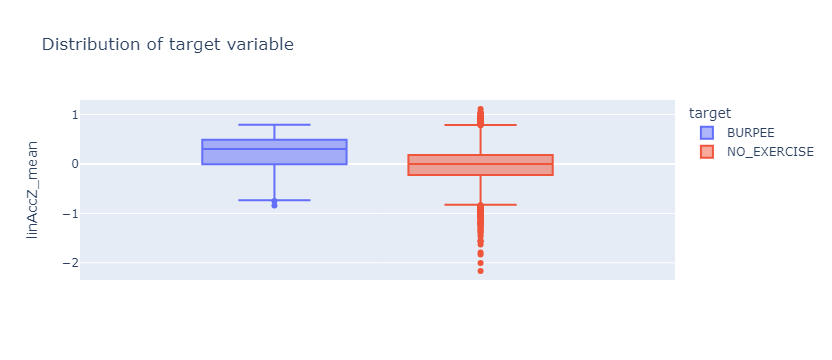

In [78]:
fig = px.box(data_custom, y="linAccZ_mean", color="target",title = 'Distribution of target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

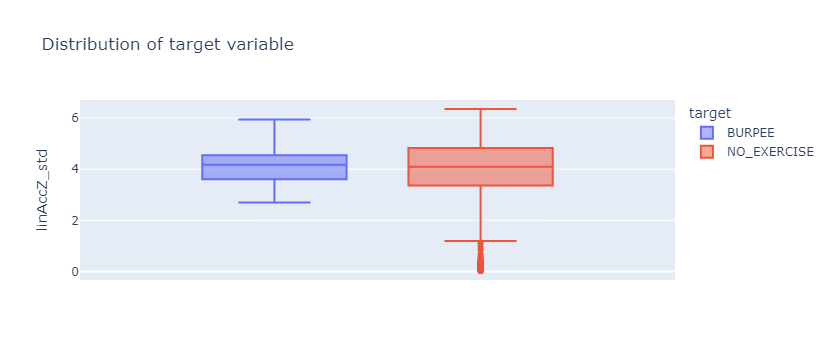

In [79]:
fig = px.box(data_custom, y="linAccZ_std", color="target",title = 'Distribution of target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

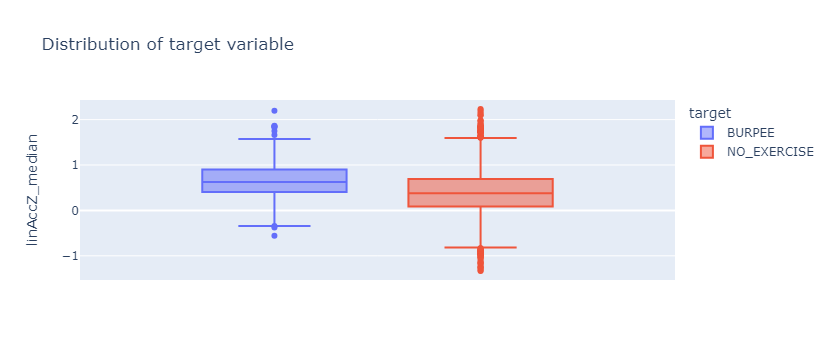

In [80]:
fig = px.box(data_custom, y="linAccZ_median", color="target",title = 'Distribution of target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

In [81]:
fig = px.box(data_custom, y="linAccZ_skewness", color="target",title = 'Distribution of target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['linAccX_mean', 'linAccX_std', 'linAccX_median', 'linAccX_max', 'linAccX_quartile_25', 'linAccX_quartile_75', 'linAccX_iqr', 'linAccY_mean', 'linAccY_std', 'linAccY_median', 'linAccY_max', 'linAccY_quartile_25', 'linAccY_quartile_75', 'linAccY_iqr', 'linAccZ_mean', 'linAccZ_std', 'linAccZ_median', 'linAccZ_max', 'linAccZ_quartile_25', 'linAccZ_quartile_75', 'linAccZ_iqr', 'gyroX_mean', 'gyroX_std', 'gyroX_median', 'gyroX_max', 'gyroX_quartile_25', 'gyroX_quartile_75', 'gyroX_iqr', 'gyroY_mean', 'gyroY_std', 'gyroY_median', 'gyroY_max', 'gyroY_quartile_25', 'gyroY_quartile_75', 'gyroY_iqr', 'gyroZ_mean', 'gyroZ_std', 'gyroZ_median', 'gyroZ_max', 'gyroZ_quartile_25', 'gyroZ_quartile_75', 'gyroZ_iqr', 'magnX_mean', 'magnX_std', 'magnX_median', 'magnX_max', 'magnX_quartile_25', 'magnX_quartile_75', 'magnX_iqr', 'magnY_mean', 'magnY_std', 'magnY_median', 'magnY_max', 'magnY_quartile_25', 'magnY_quartile_75', 'magnY_iqr', 'magnZ_mean', 'magnZ_std', 'magnZ_median', 'magnZ_max', 'magnZ_quartile_25', 'magnZ_quartile_75', 'magnZ_iqr', 'target'] but received: linAccZ_skewness

In [ ]:
fig = px.box(data_custom, y="linAccZ_kurtosis", color="target",title = 'Distribution of target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

In [ ]:
fig = px.box(data_custom, y="linAccZ_min", color="target",title = 'Distribution of target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

In [ ]:
fig = px.box(data_custom, y="linAccZ_max", color="target",title = 'Distribution of target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

In [ ]:
fig = px.box(data_custom, y="linAccZ_range", color="target",title = 'Distribution of target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

In [ ]:
fig = px.box(data_custom, y="linAccZ_quartile_25", color="target",title = 'Distribution of target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

In [ ]:
fig = px.box(data_custom, y="linAccZ_quartile_75", color="target",title = 'Distribution of target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

In [ ]:
fig = px.box(data_custom, y="linAccZ_iqr", color="target",title = 'Distribution of target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

In [ ]:
data_custom.shape

(5223, 64)

In [ ]:
data_custom.isnull().sum()

linAccX_mean           0
linAccX_std            0
linAccX_median         0
linAccX_max            0
linAccX_quartile_25    0
                      ..
magnZ_max              0
magnZ_quartile_25      0
magnZ_quartile_75      0
magnZ_iqr              0
target                 0
Length: 64, dtype: int64

In [ ]:
data_custom.target.value_counts()

NO_EXERCISE    4818
BURPEE          405
Name: target, dtype: int64

In [ ]:
corr_matrix = data_custom.drop(columns=["target"],axis=1).corr()
corr_matrix

,linAccX_mean,linAccX_std,linAccX_median,linAccX_max,linAccX_quartile_25,linAccX_quartile_75,linAccX_iqr,linAccY_mean,linAccY_std,linAccY_median,...,magnY_quartile_25,magnY_quartile_75,magnY_iqr,magnZ_mean,magnZ_std,magnZ_median,magnZ_max,magnZ_quartile_25,magnZ_quartile_75,magnZ_iqr
linAccX_mean,1.000000,-0.124613,0.969464,0.442721,0.913500,0.901644,-0.172278,-0.263290,-0.198302,-0.229786,...,0.479152,0.487195,0.009818,-0.139476,-0.077631,-0.139618,-0.148557,-0.138042,-0.138613,-0.007211
linAccX_std,-0.124613,1.000000,-0.177130,0.698977,-0.414975,0.183722,0.767079,0.241673,-0.365300,0.265964,...,-0.052817,-0.024795,0.258567,0.328344,-0.112566,0.331943,0.316450,0.334808,0.323746,-0.147250
linAccX_median,0.969464,-0.177130,1.000000,0.334851,0.921856,0.868677,-0.221701,-0.334682,-0.130477,-0.314435,...,0.508105,0.510529,-0.044433,-0.259560,-0.077700,-0.259608,-0.267825,-0.258279,-0.258751,-0.005586
linAccX_max,0.442721,0.698977,0.334851,1.000000,0.196044,0.526797,0.349977,0.198855,-0.564058,0.247991,...,0.217547,0.252236,0.283214,0.309399,-0.134984,0.311611,0.292756,0.316043,0.306302,-0.129724
linAccX_quartile_25,0.913500,-0.414975,0.921856,0.196044,1.000000,0.686993,-0.536914,-0.320876,-0.111982,-0.297725,...,0.483236,0.481190,-0.081332,-0.302073,-0.080838,-0.302817,-0.309963,-0.301075,-0.301241,-0.001431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magnZ_median,-0.139618,0.331943,-0.259608,0.311611,-0.302817,-0.036134,0.362157,0.403595,-0.306659,0.457326,...,-0.441754,-0.422542,0.230101,0.999647,0.041291,1.000000,0.997757,0.998197,0.999259,0.011502
magnZ_max,-0.148557,0.316450,-0.267825,0.292756,-0.309963,-0.045588,0.360718,0.403295,-0.292674,0.453321,...,-0.458478,-0.442315,0.204900,0.998368,0.081891,0.997757,1.000000,0.995392,0.999121,0.046796
magnZ_quartile_25,-0.138042,0.334808,-0.258279,0.316043,-0.301075,-0.035906,0.360097,0.404103,-0.314601,0.458026,...,-0.439801,-0.419618,0.238571,0.998862,0.000272,0.998197,0.995392,1.000000,0.997146,-0.040341
magnZ_quartile_75,-0.138613,0.323746,-0.258751,0.306302,-0.301241,-0.036776,0.359310,0.403091,-0.300393,0.455098,...,-0.444928,-0.426867,0.220179,0.999474,0.063792,0.999259,0.999121,0.997146,1.000000,0.035217


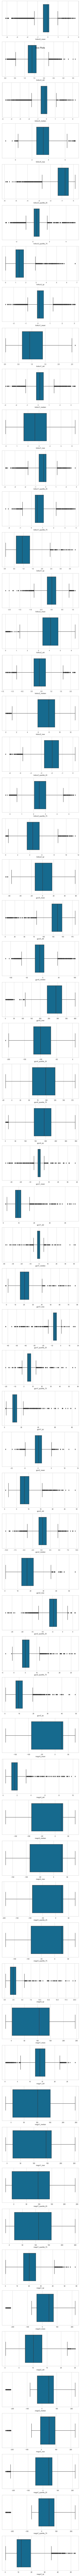

In [ ]:
# Create a figure and a set of subplots
df_box = data_custom.drop(columns=["target"],axis=1)
fig, axes = plt.subplots(nrows=len(df_box.columns), ncols=1, figsize=(8, 4 * len(df_box.columns)))

# Create a box plot for each column
for i, col in enumerate(df_box.columns):
    sns.boxplot(x=df_box[col], ax=axes[i])

# Add a title (optional)
fig.suptitle('Box Plots', fontsize=16)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

# ML with Pycaret

In [10]:
data_dev = data_custom.sample(frac=0.95, random_state=786)
data_prod = data_custom.drop(data_dev.index)

data_dev.reset_index(inplace=True, drop=True)
data_prod.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data_dev.shape))
print('Simulated data For Production ' + str(data_prod.shape))

Data for Modeling: (145, 64)
Simulated data For Production (8, 64)


In [11]:
model = setup(
    # Basic options
    data = data_dev,
    target = "target",
    train_size = 0.8, 
    preprocess = True,
    
    # Dealing with multicollinearity
    remove_multicollinearity = True,
    multicollinearity_threshold = 0.9,
        
    # Feature normalization with outliers
    normalize = True,
    normalize_method = 'robust',
        
    # Paralellization options
    n_jobs = - 1,
    use_gpu = False,
    
    # Imbalance Dataset
    fix_imbalance=True,

    remove_outliers= True, 
    outliers_threshold= 0.03,
    
    # Feature Importance
    feature_selection = True,
    n_features_to_select= 10
)

[LightGBM] [Info] Number of positive: 95, number of negative: 95
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2414
[LightGBM] [Info] Number of data points in the train set: 190, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

,Description,Value
0,Session id,7991
1,Target,target
2,Target type,Binary
3,Target mapping,"BURPEE: 0, NO_EXERCISE: 1"
4,Original data shape,"(145, 64)"
5,Transformed data shape,"(219, 11)"
6,Transformed train set shape,"(190, 11)"
7,Transformed test set shape,"(29, 11)"
8,Numeric features,63
9,Preprocess,True


In [12]:
models = compare_models(sort="F1", fold=2)
models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8534,0.7133,0.8534,0.8261,0.8306,0.2435,0.2678,0.4500
nb,Naive Bayes,0.8190,0.7886,0.8190,0.7970,0.8060,0.1714,0.1759,2.3950
xgboost,Extreme Gradient Boosting,0.8276,0.6199,0.8276,0.7906,0.8037,0.1390,0.1497,0.2900
ada,Ada Boost Classifier,0.7931,0.6677,0.7931,0.7910,0.7918,0.1734,0.1738,0.2900
rf,Random Forest Classifier,0.8017,0.6514,0.8017,0.7759,0.7873,0.0953,0.0977,2.4950
qda,Quadratic Discriminant Analysis,0.8534,0.5000,0.8534,0.7284,0.7860,0.0000,0.0000,2.3000
catboost,CatBoost Classifier,0.7759,0.6438,0.7759,0.7644,0.7700,0.0549,0.0550,2.0350
knn,K Neighbors Classifier,0.7328,0.8243,0.7328,0.8675,0.7699,0.3370,0.3991,2.3250
gbc,Gradient Boosting Classifier,0.7845,0.6346,0.7845,0.7569,0.7686,0.0245,0.0276,0.2900
lightgbm,Light Gradient Boosting Machine,0.7586,0.6609,0.7586,0.7685,0.7619,0.0687,0.0703,0.3150


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=7991, verbose=0, warm_start=False)

In [13]:
cnt_models_df = pull()
cnt_models_df

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8534,0.7133,0.8534,0.8261,0.8306,0.2435,0.2678,0.450
nb,Naive Bayes,0.8190,0.7886,0.8190,0.7970,0.8060,0.1714,0.1759,2.395
xgboost,Extreme Gradient Boosting,0.8276,0.6199,0.8276,0.7906,0.8037,0.1390,0.1497,0.290
ada,Ada Boost Classifier,0.7931,0.6677,0.7931,0.7910,0.7918,0.1734,0.1738,0.290
rf,Random Forest Classifier,0.8017,0.6514,0.8017,0.7759,0.7873,0.0953,0.0977,2.495
qda,Quadratic Discriminant Analysis,0.8534,0.5000,0.8534,0.7284,0.7860,0.0000,0.0000,2.300
catboost,CatBoost Classifier,0.7759,0.6438,0.7759,0.7644,0.7700,0.0549,0.0550,2.035
knn,K Neighbors Classifier,0.7328,0.8243,0.7328,0.8675,0.7699,0.3370,0.3991,2.325
gbc,Gradient Boosting Classifier,0.7845,0.6346,0.7845,0.7569,0.7686,0.0245,0.0276,0.290
lightgbm,Light Gradient Boosting Machine,0.7586,0.6609,0.7586,0.7685,0.7619,0.0687,0.0703,0.315


In [14]:
clf = create_model('et', fold = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8276,0.6325,0.8276,0.7848,0.8022,0.0823,0.0885
1,0.8793,0.7574,0.8793,0.8673,0.8590,0.4047,0.4471
Mean,0.8534,0.6949,0.8534,0.8261,0.8306,0.2435,0.2678
Std,0.0259,0.0624,0.0259,0.0413,0.0284,0.1612,0.1793


In [15]:
tuned_clf = tune_model(clf, optimize = 'F1', fold = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7586,0.6825,0.7586,0.7586,0.7586,-0.0150,-0.0150
1,0.7586,0.7687,0.7586,0.7793,0.7682,0.1559,0.1571
Mean,0.7586,0.7256,0.7586,0.7690,0.7634,0.0705,0.0710
Std,0.0000,0.0431,0.0000,0.0103,0.0048,0.0855,0.0860


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [16]:
print("Total of features: ", len(tuned_clf.feature_importances_))

Total of features:  10


In [17]:
evaluate_model(tuned_clf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Save Model

In [18]:
# We finalize model (we train on the whole set)
model_final = finalize_model(tuned_clf)

In [19]:
# Export the PyCaret model
save_model(model_final, 'BURPEE')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['linAccX_mean', 'linAccX_std',
                                              'linAccX_median', 'linAccX_max',
                                              'linAccX_quartile_25',
                                              'linAccX_quartile_75',
                                              'linAccX_iqr', 'linAccY_mean',
                                              'linAcc...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                             

# Use in Production

In [85]:
# Load the model
pipeline = load_model(model_name="BURPEE")

Transformation Pipeline and Model Successfully Loaded


In [86]:
# Utilizar modelo
prediction = predict_model(pipeline, data_prod, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9502,0.9857,0.9502,0.9560,0.9524,0.7178,0.7221


In [87]:
prediction

,linAccX_mean,linAccX_std,linAccX_median,linAccX_max,linAccX_quartile_25,linAccX_quartile_75,linAccX_iqr,linAccY_mean,linAccY_std,linAccY_median,...,magnZ_std,magnZ_median,magnZ_max,magnZ_quartile_25,magnZ_quartile_75,magnZ_iqr,target,prediction_label,prediction_score_BURPEE,prediction_score_NO_EXERCISE
0,0.173815,0.408010,0.236277,0.886921,-0.048661,0.426929,0.475589,0.088324,1.836286,0.225627,...,7.363100,48.779366,57.090847,43.095860,52.480717,9.384859,0,BURPEE,0.78,0.22
1,0.090439,0.389191,0.153581,0.870664,-0.007711,0.316913,0.324624,0.120405,1.774973,0.338550,...,7.795457,47.712265,55.629227,40.687317,52.045769,11.358454,0,BURPEE,0.63,0.37
2,0.119738,1.461252,0.012827,3.928819,-0.345487,0.703218,1.048705,0.035062,0.498758,0.105808,...,7.565740,49.565807,55.633102,42.948498,52.692909,9.744415,0,BURPEE,0.64,0.36
3,0.151964,1.423415,0.182589,3.677013,-0.244109,0.765568,1.009677,0.159594,0.554215,0.246902,...,7.919278,49.984577,55.413029,42.037952,53.097107,11.059155,0,NO_EXERCISE,0.39,0.61
4,-0.197294,0.436849,-0.159280,0.459173,-0.412223,0.143001,0.555224,-0.219534,2.075932,-0.559498,...,16.163759,42.909821,52.311714,30.366137,50.086094,19.719959,0,BURPEE,0.97,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,-0.014782,1.312396,-0.237287,3.684033,-0.917692,0.407961,1.325653,0.091323,1.496946,-0.167477,...,15.869020,-19.523270,-1.570715,-31.850327,-7.004033,24.846294,1,NO_EXERCISE,0.06,0.94
257,-0.131341,0.952816,-0.277762,2.874554,-0.555399,0.316905,0.872304,-0.187643,1.147653,-0.264688,...,8.789289,-20.154505,-1.652578,-24.640043,-12.438382,12.201661,1,NO_EXERCISE,0.00,1.00
258,0.199552,1.265306,0.291419,2.859243,-0.395286,0.776374,1.171660,-0.222808,1.228360,-0.373030,...,7.564753,-211.437698,-209.515533,-215.626556,-210.450134,5.176425,1,NO_EXERCISE,0.08,0.92
259,-0.853092,1.092944,-1.041472,2.531234,-1.680949,-0.279690,1.401258,-0.980223,1.573432,-1.165804,...,13.353123,-18.767002,-0.970668,-27.141678,-6.296889,20.844790,1,NO_EXERCISE,0.08,0.92


# Scores

In [ ]:
true_labels = prediction["target"]
predictions = prediction["prediction_label"]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(true_labels, predictions)
positive_class_label = "BURPEE"
precision = precision_score(true_labels, predictions, pos_label=positive_class_label)
recall = recall_score(true_labels, predictions, pos_label=positive_class_label)
f1 = f1_score(true_labels, predictions, pos_label=positive_class_label)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

In [ ]:
from sklearn.metrics import roc_auc_score

predictions_prob = prediction["prediction_score_SQUAT"]
binary_true_labels = true_labels.map({"BRUPEE": 1, "NO_EXERCISE": 0})
auc_score = roc_auc_score(binary_true_labels, predictions_prob)

print(f"AUC: {auc_score}")